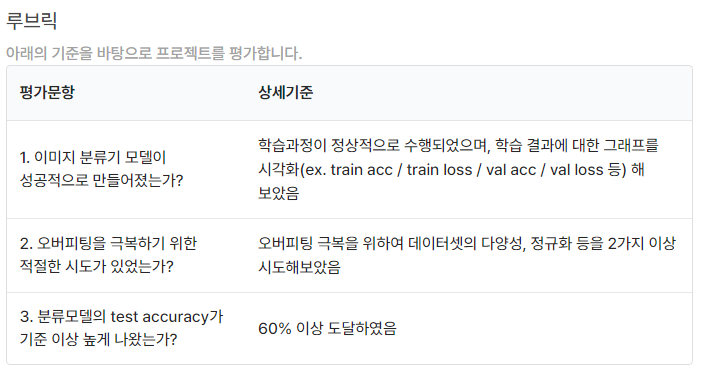

## 데이터 불러오기 + Resize 하기

In [1]:
from PIL import Image
import glob
import os

import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("import 완료!")

import 완료!


In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 200x200 사이즈로 바꾸어 저장합니다.
	target_size=(200,200)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1311  images to be resized.
1311  images resized.
가위 이미지 resize 완료!


In [3]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/rock"

resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

1475  images to be resized.
1475  images resized.
바위 이미지 resize 완료!


In [4]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/paper"

resize_images(image_dir_path)
print("보 이미지 resize 완료!")

1393  images to be resized.
1393  images resized.
보 이미지 resize 완료!


In [5]:
import numpy as np

def load_data(img_path, number_of_data=4179):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=200
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"개 입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train"

(x_train, y_train)=load_data(image_dir_path)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

데이터의 이미지 개수는 4179 개 입니다.
x_train shape: (4179, 200, 200, 3)
y_train shape: (4179,)


REF) kaggle에서 가위 바위 보 이미지를 더 다운받아 추가했다. 다운 받은 이미지의 사이즈는 200x200이라 전부 resize했다.    
https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors 

REF) 모델학습에서 계속 (loss: nan - accuracy: 0.0000e+00)이 되는 문제가 생겨서 데이터를 섞어주었다.    
https://datascience.stackexchange.com/questions/100518/i-am-getting-loss-nan-accuracy-0-0000e00-for-all-epochs-after-training-th

라벨:  0


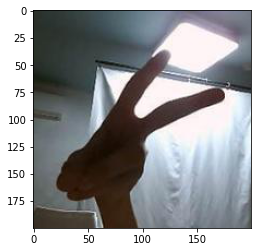

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## Data Augmentation
데이터의 개수가 작아 증식시켰다. 

In [7]:
# parameter Initialization 
batch_size = 32
IMG_HEIGHT = 200
IMG_WIDTH = 200

In [8]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,             # 0~1 사이의 값으로 정규화
                                   shear_range=0.1,
                                   rotation_range=0.1,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2) # set validation split

In [10]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train"

train_generator = train_datagen.flow_from_directory(image_dir_path,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    batch_size=batch_size,
                                                    class_mode='sparse',
                                                    subset='training') # set as training data

Found 3344 images belonging to 3 classes.


REF) Image Data Generator의 class mode    
https://keras.io/ko/preprocessing/image/ "categorical", "binary", "sparse", "input", "other" 혹은 None 중 하나. 디폴트 값: "categorical"

In [11]:
train_generator[0][0].shape

(32, 200, 200, 3)

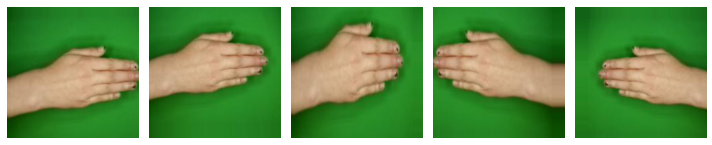

In [12]:
augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [13]:
validation_generator = train_datagen.flow_from_directory(
    image_dir_path,                       # same directory as training data
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation')                  # set as validation data


Found 835 images belonging to 3 classes.


REF)    
train, validation의 directory가 같을 때 split하면서 경로 불러오는 방법     
https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator    

.ipynb_checkpoints 때문에 class가 4개 나왔을 때 해결 방법   
https://stackoverflow.com/questions/51887758/is-there-a-way-to-disable-saving-to-checkpoints-for-jupyter-notebooks

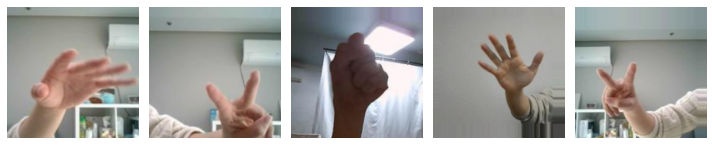

In [14]:
sample_training_images, _ = next(validation_generator)
plotImages(sample_training_images[:5])

In [15]:
_[:5] # 정답 데이터

array([0., 2., 1., 0., 2.], dtype=float32)

## 딥러닝 네트워크 설계하기

In [16]:
# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200,200,3)))
model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(256, (3,3), activation='relu'))
model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  12
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 198, 198, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 97, 97, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (N

In [17]:
# input_layer=tf.keras.layers.Input(shape=(224, 224, 3))
# #1
# x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
# x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.BatchNormalization()(x)
# # x=tf.keras.layers.Dropout(0.5)(x)
# x=tf.keras.layers.MaxPool2D((2, 2))(x)
# #2
# x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.BatchNormalization()(x)
# # x=tf.keras.layers.Dropout(0.5)(x)
# x=tf.keras.layers.MaxPool2D((2, 2))(x)
# #3
# x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.BatchNormalization()(x)
# # x=tf.keras.layers.Dropout(0.5)(x)
# x=tf.keras.layers.MaxPool2D((2, 2))(x)
# #4
# x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.BatchNormalization()(x)
# # x=tf.keras.layers.Dropout(0.5)(x)
# x=tf.keras.layers.MaxPool2D((2, 2))(x)
# #5
# x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.BatchNormalization()(x)
# # x=tf.keras.layers.Dropout(0.5)(x)
# x=tf.keras.layers.MaxPool2D((2, 2))(x)
# #6
# x=tf.keras.layers.Flatten()(x)
# x=tf.keras.layers.Dense(1024, activation='relu')(x)
# x=tf.keras.layers.Dense(512, activation='relu')(x)
# out_layer=tf.keras.layers.Dense(3, activation='softmax')(x)

# model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
# model.summary()

In [18]:
# inputs = keras.Input(shape=(200, 200, 3))
# x = inputs
# #x = layers.MaxPooling2D(2)(x)
# _x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same")(x)
# _x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same")(_x)
# x = _x
# _x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same")(x)
# _x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same")(_x)
# x = x + _x
# x = tf.keras.layers.MaxPooling2D(2)(x)
# _x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same")(x)
# _x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same")(_x)
# x = x + _x
# x = tf.keras.layers.MaxPooling2D(2)(x)
# _x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same")(x)
# _x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same")(_x)
# x = x + _x
# x = tf.keras.layers.MaxPooling2D(2)(x)

# x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(128)(x)
# x = tf.keras.layers.Dense(128)(x)
# x = tf.keras.layers.Dense(3, activation='softmax')(x)
# outputs = x

# model = keras.Model(inputs, outputs)
# model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 200, 200, 128 3584        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 200, 200, 128 147584      conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 200, 200, 128 147584      conv2d_1[0][0]                   
______________________________________________________________________________________________

REF) ResNet 예제 코드    
https://dataplay.tistory.com/27

## 딥러닝 네트워크 학습시키기

In [17]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics= ["accuracy"])

In [18]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size, 
                              validation_data = validation_generator,
                              validation_steps = validation_generator.samples // batch_size,
                              epochs = 200)

/opt/conda/lib/python3.9/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
104/104 [==============================] - 41s 349ms/step - loss: 1.1826 - accuracy: 0.7129 - val_loss: 16.0984 - val_accuracy: 0.3522
Epoch 2/200
104/104 [==============================] - 35s 339ms/step - loss: 0.4187 - accuracy: 0.8524 - val_loss: 23.9856 - val_accuracy: 0.3534
Epoch 3/200
104/104 [==============================] - 35s 338ms/step - loss: 0.3451 - accuracy: 0.8853 - val_loss: 15.7877 - val_accuracy: 0.3546
Epoch 4/200
104/104 [==============================] - 35s 337ms/step - loss: 0.3035 - accuracy: 0.8995 - val_loss: 7.0421 - val_accuracy: 0.3834
Epoch 5/200
104/104 [==============================] - 35s 338ms/step - loss: 0.1772 - accuracy: 0.9405 - val_loss: 1.8478 - val_accuracy: 0.6142
Epoch 6/200
104/104 [==============================] - 35s 335ms/step - loss: 0.1701 - accuracy: 0.9378 - val_loss: 0.8389 - val_accuracy: 0.7632
Epoch 7/200
104/104 [==============================] - 35s 335ms/step - loss: 0.1887 - accuracy: 0.9375 - val_loss: 0.613

REF) image generator 돌린 후 train, validation 나눠 모델 돌리는 코드    
https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator

/tmp/ipykernel_9393/886603953.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs_range, acc, 'b', color = 'Indigo', label='Training acc')
/tmp/ipykernel_9393/886603953.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs_range, val_acc, 'b', color = 'HotPink', label='Validation acc')
/tmp/ipykernel_9393/886603953.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs_range, loss, 'b', color = 'OliveDrab', label='Training loss')
/tmp/ipykernel_9393/886603953.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> c

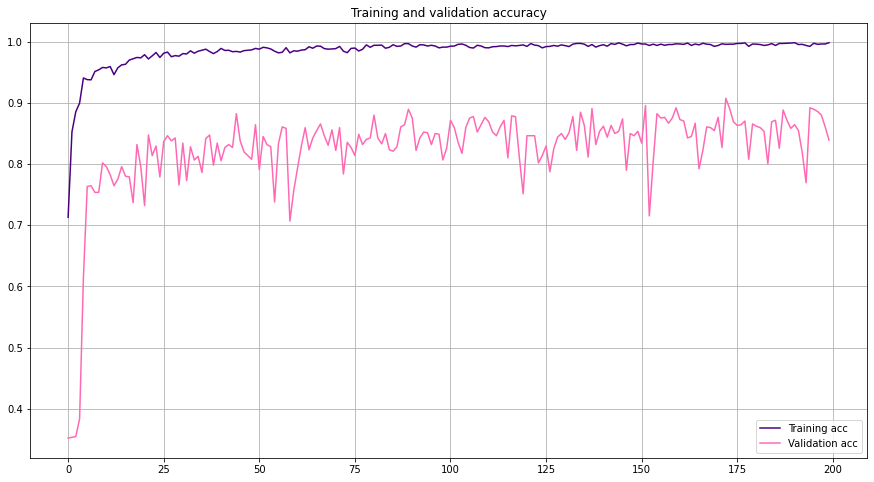

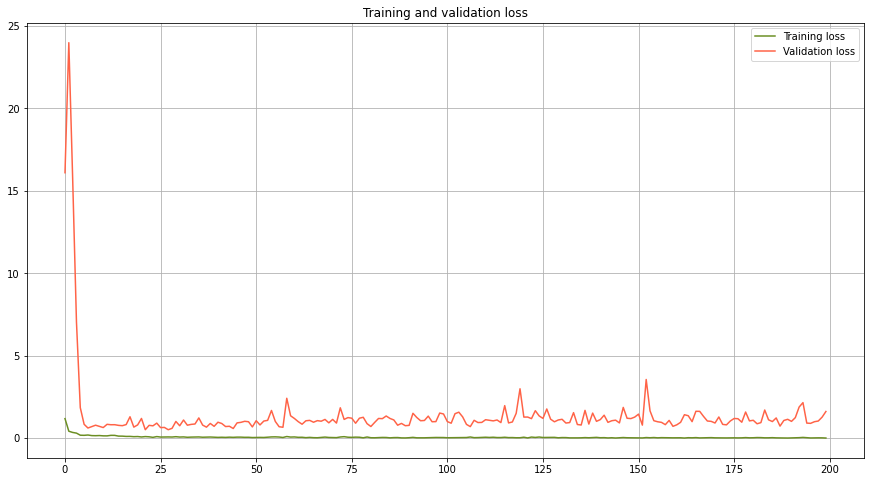

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(15,8))

plt.plot(epochs_range, acc, 'b', color = 'Indigo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', color = 'HotPink', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure(figsize=(15,8))

plt.plot(epochs_range, loss, 'b', color = 'OliveDrab', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', color = 'Tomato', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()

plt.show()

REF) matplotlib 그래프 종류, 색상    
https://scribblinganything.tistory.com/356    
https://www.w3schools.com/cssref/css_colors.php 

## 얼마나 잘 만들었는지 확인하기(테스트)

In [20]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 200x200 사이즈로 바꾸어 저장합니다.
	target_size=(200,200)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [21]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"

resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [22]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"

resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [23]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=200
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"개 입니다.")
    return imgs, labels

test_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

(x_test, y_test)=load_data(test_dir_path)

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

데이터의 이미지 개수는 300 개 입니다.
x_test shape: (300, 200, 200, 3)
y_test shape: (300,)


In [24]:
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

x_test shape: (300, 200, 200, 3)
y_test shape: (300,)


In [25]:
print('최소값:',np.min(x_test_norm), ' 최대값:',np.max(x_test_norm))

최소값: 0.0  최대값: 1.0


In [26]:
print(f"Before Reshape - x_test shape: {x_test_norm.shape}")
x_test_reshaped=x_test_norm.reshape( -1, 200, 200, 3)
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_test shape: (300, 200, 200, 3)
After Reshape - x_test_reshaped shape: (300, 200, 200, 3)


테스트용 데이터가 준비되었으니, 위에서 훈련시킨 model을 사용하여 test_accuracy를 측정해 봅시다.

In [27]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 1s - loss: 19.0769 - accuracy: 0.3433
test_loss: 19.07694435119629
test_accuracy: 0.34333333373069763


## 회고

<헤맸던 부분>
- model.compile에서 ValueError: Data cardinality is ambiguous: x sizes: 900, y sizes: 300 에러가 났다. 실제로 shaped을 살펴보니 x_train은 300개 였는데, x_train_reshaped은 900개로 변해있었다. reshape코드 위치가 compile 다음으로 되어있어서 실행이 겹치다보니 그렇게 된거였다. 
- model.compile에서 ValueError: Input 0 of layer sequential_6 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (None, 28, 28, 3) 에러가 났다. 모델 구성할 때 input_shape=(28,28,3)으로 넣어줬어야하는데 흑백인 MNIST 따라 1로 넣었더니 생긴 에러였다. 
- test로 evaluate할 때도 또 ValueError: Data cardinality is ambiguous: 에러가 나왔다. 왜 resahpe된 이미지가 300개에서 900개로 늘어나는지 모르겠다. 
- 처음엔 내 손을 train으로 넣고, 지영님 손을 test로 넣어 accuracy가 0.47이 나왔다. 
- train과 test를 한 데이터에서 split해서 나눴더니 accuracy가 0.9대로 나왔다.
- VGG16에서 data augmentation 코드를 따왔는데, VGG16에서는 이미 train과 validation이 나눠져 있어서 directory가 2개였는데, 이번 데이터는 하나여서 헤맸다. 
- train과 validation이 갑자기 4개의 클래스로 나와서, 진표 퍼실님의 도움으로 cloud shell에서 .ipynb_checkpoints라는 보이지 않는 폴더를 지울 수 있었다. 이후로도 같은 현상이 계속 반복되었다. 
- 모델 학습 할 때 TypeError: 'NoneType' object is not callable 에러가 나왔다. 
- test 데이터로 evaluate하는데 shape이 다르다는 에러가 났다. 소명님 조언대로 compile에서 optimizer만 tf.keras 방식으로 넣으니까 해결되었다. 
- MNIST에서 사용했던 모델로도 성적이 잘 안나와서 VGG16을 가져왔는데, 별로 차이가 없었다. 
- pre-trained model 중 imagenet/mobilenet_v2_130_224/classification을 사용해봤는데, 모델 학습에서 수치가 계속 loss: nan - accuracy: 0.0000e+00으로 나타났다. 더 이상 시도해보지 못하고 포기했다.    

<새롭게 알게된 부분>
- 흑백 이미지는 채널을 한 개로 쓰면 되지만, 컬러는 3개이므로 MNIST에서 코드를 따올 때 주의해야한다. 
- 기존에 했던 것 처럼 train, test split을 해버리면, 비슷한 사진이 많기 때문에 accurcy가 높게 나온다. 학습했던 적 없는 새로운 데이터를 판단해야하기 때문에 test는 새로운 사람의 손을 넣어줘야한다.  
- augmentation 할 때는 train data 자체가 아니라, train의 directory를 넣어줘야한다. 
- dropout을 넣으니 오히려 accuracy 0.4에서 0.33으로 떨어졌다. 과대적합이 없는 이상 굳이 넣을 필요가 없는 것 같다. 
- 기존 데이터 자체가 그닥 다양하지 않을때는 augmentation이 별로 효과가 없다. 
- 모델을 기존 MNIST에서 사용했던 모델 > VGG16 > ResNet으로 바꿔주었는데 0.3에서 별로 변화가 없었다. 
- 학습데이터를 300개 > 2700개 > 4100개로 늘려주어도 accuracy는 별로 변화가 없거나 오히려 떨어진다. 
- 새로 추가한 이미지때문에 사이즈를 200X200으로 맞췄는데, pre-trained model은 224X224 사이즈로 학습된 모델이었다. 전이학습을 하려면 usage를 잘 읽고 목적과 데이터에 맞는 모델을 잘 찾아야겠다. 
- 뒤늦게 선배 그루분의 깃허브를 보니, 학습을 반복해 최적의 하이퍼파라미터를 찾는 함수를 짜셨던데..다음부터는 중구난방 시도하지말고 최적의 방식을 찾아야겠다.    

<아직도 모르는 것>
- reshape과 resize가 헷갈린다. reshape은 픽셀과 채널의 개수를 조정?하는거고 resize는 이미지의 크기를 바꾸는건데...
- 가위/바위/보 이미지 각각 5000장씩 다운 받을 수 있는 곳은 없을까??
- 여러가지 시도를 해봤는데, 최대 0.4가 나오고, 이 정도 크기의 데이터에서 정확도 높히는 방법을 더이상 모르겠다. 
